In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
feature_frames = []
target_frames = []
target_dir_frames = []

instrument = "ETH-PERPETUAL"
path = f"/Users/joeybesseling/Documents/Programmeren/Projects/Data/{instrument}/"
instrument = f"{instrument}"
interval = 1
depth = 20

for i in range(70, 71):
    try:
        df = pd.read_parquet(path + f"{instrument}_1_{depth}({i}).parquet")
        df["timestamp"] = pd.to_datetime(df.timestamp)
        df = df.set_index("timestamp", drop = True)
        try: df = df.drop("Unnamed: 0", axis = 1)
        except: pass
        # if interval > 1:
        #     for column in df.columns:
        #         if "trade" in column:
        #             df[column] = df[column].rolling(interval).sum()
        print(f"Number of rows: {df.shape[0]}")
    except Exception as e: print(e)
    print(i)

Number of rows: 128761
70


In [27]:
def plot(df):
    d = df.copy()
    
    fig, axs = plt.subplots(4,1, figsize = (25,15))
    d["bid1_price"].plot(ax = axs[0])
    d["ask1_price"].plot(ax = axs[0])
    d["bid2_price"].plot(ax = axs[0])
    d["ask2_price"].plot(ax = axs[0])
    
    # ((d["ask1_size"] - d["bid1_size"])/(d["bid1_size"] + d["ask1_size"])).resample("5s").last().plot(ax = axs[1], label = "rat1")
    # ((d["ask2_size"] - d["bid2_size"])/(d["bid2_size"] + d["ask2_size"])).resample("5s").last().plot(ax = axs[1], label = "rat2")

    d["ask1_size"].plot(ax = axs[1], label = "ask1_size")
    d["bid1_size"].plot(ax = axs[1], label = "bid1_size")
    # d["bid1_size"].plot(ax = axs[1])
    # d["ask1_size"].plot(ax = axs[1])
    # d["bid2_size"].plot(ax = axs[1])
    # d["ask2_size"].plot(ax = axs[1])
    d["trade_vol_buy"].plot(ax = axs[2])
    d["trade_vol_sell"].plot(ax = axs[2])
    
    axs[1].set_ylim(0,100000)
    axs[2].set_ylim(0,100000)
    
    # vol_buy_min = d["trade_vol_buy"].resample("300s").sum()
    # vol_sell_min = d["trade_vol_sell"].resample("300s").sum()
    # vol_min = d["trade_vol"].resample("1D").sum()
    # vol_buy_min.plot(ax = axs[3], label = "min_buy_volume")
    # vol_sell_min.plot(ax = axs[3], label = "min_sell_volume")
    # ((vol_sell_min - vol_buy_min) / (vol_sell_min + vol_buy_min)).plot(ax = axs[3], label = "rat_vol")
    
    for ax in axs:
        ax.legend()
        ax.grid()
        
    plt.show()

No handles with labels found to put in legend.


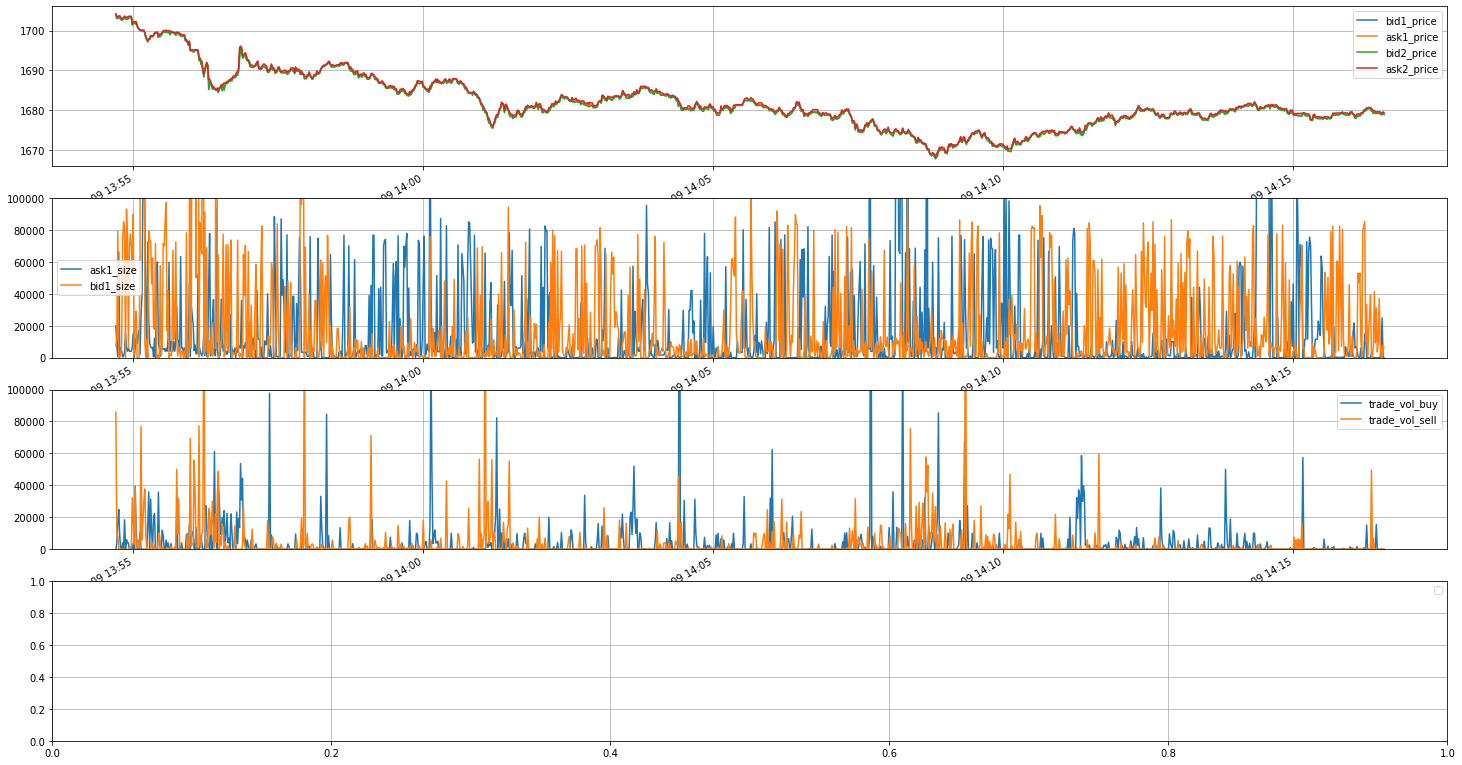

In [28]:
plot(df.iloc[92500:93800]) # 110.000 / 115.000

In [20]:
df.trade_vol.sum()/10**6

346.31566

In [18]:
df.iloc[0].name, df.iloc[-1].name

(Timestamp('2022-08-05 10:45:58'), Timestamp('2022-08-08 08:31:30'))

Timestamp('2022-08-08 08:31:30')